In [1]:
# logistic regression
# by Sean Kang

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
purchase_data = pd.read_csv('purchasehistory.csv')



In [2]:
#CHECK FOR NULL VALUES
purchase_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [3]:
purchase_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


No null found

<Axes: xlabel='Purchased', ylabel='count'>

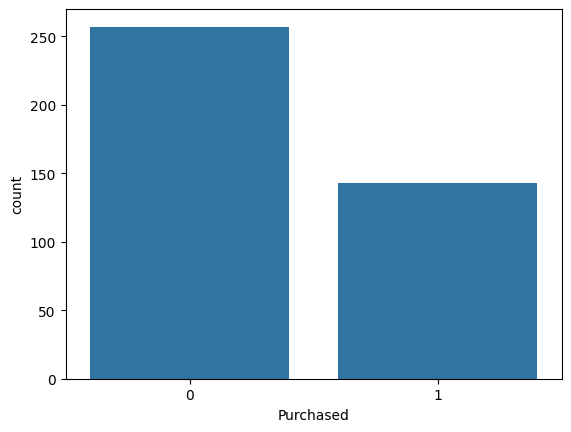

In [4]:
# lets explore the data
# Check for the total number of those who purchased and those who did not purchase:
sns.countplot(x='Purchased', data=purchase_data)
#Zero indicates those who did not purchase and 1 for those who bought.

<Axes: xlabel='Purchased', ylabel='count'>

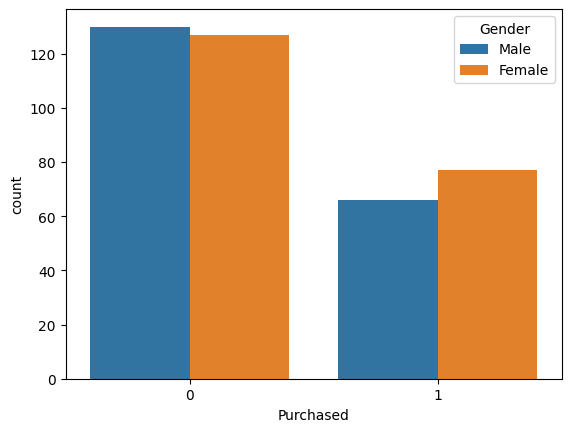

In [5]:
# explore how many males vs females did the purchase.
sns.countplot(x='Purchased', hue='Gender', data=purchase_data)
#From the plot, we can see that most people who did not purchase are male, and the majority of those who purchased are female.

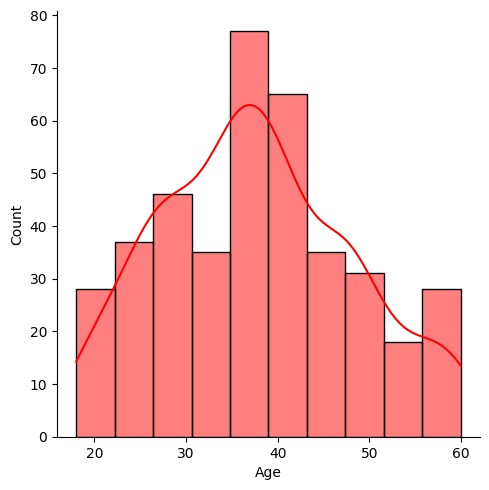

In [6]:
# We can also check the age distribution in the dataset
sns.displot(x='Age', data=purchase_data, color='red', kde=True)
# we can see that the majority of the people are between the ages of 33 and 43.

In [7]:
# clean up the data
# we dont need the userid so lets remove it
if 'User ID' in purchase_data.columns:
    purchase_data.drop('User ID', axis=1, inplace=True)
purchase_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
# CHANGE CATEGORICAL VARIABLE TO DUMMIES
# regression works better with numerical data, not string or objects
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
# changing the gender to numerical using one hot encoding

if 'Gender' in purchase_data.columns:
    gender = pd.get_dummies(purchase_data['Gender'], drop_first=True)
if 'Gender' in purchase_data.columns:
    purchase_data.drop('Gender',axis=1,inplace=True)
purchase_data = pd.concat([purchase_data,gender], axis=1)

In [10]:
purchase_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True
...,...,...,...,...
395,46,41000,1,False
396,51,23000,1,True
397,50,20000,1,False
398,36,33000,0,True


In [11]:

# SPLIT DATA TO INDEPENDENT AND DEPENDENT VARIABLES
X = purchase_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male -- all the rows, but I want the 0, 1, and 3 column (zero based)
y = purchase_data.iloc[:, 2] # Purchased -- all the rows, but I want the 2nd column (zero based)
X
# we have 400 rows.

,Age,EstimatedSalary,Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True
...,...,...,...
395,46,41000,False
396,51,23000,True
397,50,20000,False
398,36,33000,True


In [12]:
# output variable if they purchased or not
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [13]:
# FEATURE SCALING
# there is a big difference of absolute values between age and estimated salary
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [14]:

# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(280, 3)
(120, 3)
(280,)
(120,)


In [15]:


# FIT/TRAIN MODEL
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [16]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
# PREDICTIONS
y_pred = classifier.predict(X_test)

In [18]:
# comparing the prediction with actual results

result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(result)

     Actual  Predicted
398       0          0
125       0          0
328       1          1
339       1          1
172       0          0
..      ...        ...
91        0          0
322       0          0
248       0          0
186       0          0
395       1          0

[120 rows x 2 columns]


In [19]:
# examine the coefficients and intercept
classifier.coef_

# what do these coefficients mean?
# positive means it has a positive effect on the dependent variable
# negative means it has a negative effect on the dependent variable
# the magnitude of the coefficient indicates the strength of the effect

array([[2.3682876 , 1.4292834 , 0.20975091]])

In [20]:
classifier.intercept_
# how to interpret the intercept?
# the intercept is the value of the dependent variable when all the independent variables are zero
# In our case, this intercept is the z that we get when all the independent variables are zero

array([-1.13523692])

In [21]:
# the matrix of probabilities of the predicted output is zero or one.
# first column is the product not purchased 1-P(x).
# second column is the product purchased P(x).
print(classifier.predict_proba(X_scaled))

[[9.99304897e-01 6.95102916e-04]
 [9.73648974e-01 2.63510260e-02]
 [9.93937947e-01 6.06205288e-03]
 [9.86424685e-01 1.35753153e-02]
 [9.92448473e-01 7.55152719e-03]
 [9.78632339e-01 2.13676606e-02]
 [9.59012027e-01 4.09879732e-02]
 [3.21158213e-01 6.78841787e-01]
 [9.95159814e-01 4.84018641e-03]
 [8.94772779e-01 1.05227221e-01]
 [9.71987995e-01 2.80120047e-02]
 [9.91180137e-01 8.81986297e-03]
 [9.85691867e-01 1.43081328e-02]
 [9.87532605e-01 1.24673945e-02]
 [9.92254008e-01 7.74599169e-03]
 [9.20452924e-01 7.95470757e-02]
 [6.64911528e-01 3.35088472e-01]
 [7.49452387e-01 2.50547613e-01]
 [6.86874999e-01 3.13125001e-01]
 [6.70569022e-01 3.29430978e-01]
 [7.79641189e-01 2.20358811e-01]
 [5.24367754e-01 4.75632246e-01]
 [4.47080341e-01 5.52919659e-01]
 [8.43322828e-01 1.56677172e-01]
 [7.30153865e-01 2.69846135e-01]
 [7.09944169e-01 2.90055831e-01]
 [5.26710091e-01 4.73289909e-01]
 [7.09919196e-01 2.90080804e-01]
 [9.82039080e-01 1.79609195e-02]
 [9.90031388e-01 9.96861214e-03]
 [9.044723

In [22]:
# easier way to look at these percentages 
for item in classifier.predict_proba(X_scaled):
    print("{0:.6g} %".format(item[0] * 100 ), "{0:.6g} %".format(item[1] * 100))

99.9305 % 0.0695103 %
97.3649 % 2.6351 %
99.3938 % 0.606205 %
98.6425 % 1.35753 %
99.2448 % 0.755153 %
97.8632 % 2.13677 %
95.9012 % 4.0988 %
32.1158 % 67.8842 %
99.516 % 0.484019 %
89.4773 % 10.5227 %
97.1988 % 2.8012 %
99.118 % 0.881986 %
98.5692 % 1.43081 %
98.7533 % 1.24674 %
99.2254 % 0.774599 %
92.0453 % 7.95471 %
66.4912 % 33.5088 %
74.9452 % 25.0548 %
68.6875 % 31.3125 %
67.0569 % 32.9431 %
77.9641 % 22.0359 %
52.4368 % 47.5632 %
44.708 % 55.292 %
84.3323 % 15.6677 %
73.0154 % 26.9846 %
70.9944 % 29.0056 %
52.671 % 47.329 %
70.9919 % 29.0081 %
98.2039 % 1.79609 %
99.0031 % 0.996861 %
90.4472 % 9.55277 %
71.6705 % 28.3295 %
99.9367 % 0.0633354 %
99.01 % 0.99002 %
92.2814 % 7.71856 %
96.4965 % 3.50348 %
98.4415 % 1.55845 %
97.1346 % 2.86535 %
97.9816 % 2.0184 %
99.54 % 0.460007 %
99.7439 % 0.256134 %
96.0092 % 3.99084 %
47.9043 % 52.0957 %
99.2969 % 0.703072 %
94.9137 % 5.08628 %
99.821 % 0.17896 %
96.7557 % 3.24427 %
98.8011 % 1.19885 %
47.8495 % 52.1505 %
88.4725 % 11.5275 %
99

In [23]:
print(classifier.predict_proba(X_scaled).shape)
# number of probabilities is equal to the number of rows in the dataset.

(400, 2)


In [24]:
# EVALUATE MODEL -- how good is the model for prediction??

cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cf_matrix)
# True negatives(TN) in the upper-left position.
# False negatives(FN) in the lower-left position.
# False positives(FP) in the upper-right position.
# True positives(TP) in the lower-right position.

Confusion Matrix 
 [[63  9]
 [14 34]]


Text(0.5, 23.52222222222222, 'Predicted label')

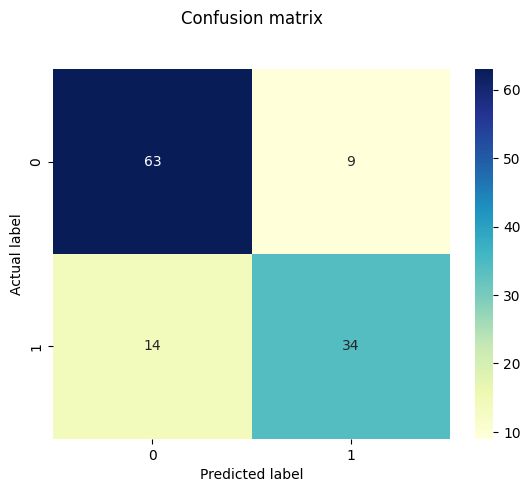

In [25]:
# look at the data as heatmap

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# 63 zeros predicted correctly 
# 34 ones predicted correctly

# True negatives(TN) in the upper-left position.
# False negatives(FN) in the lower-left position.
# False positives(FP) in the upper-right position.
# True positives(TP) in the lower-right position.


In [26]:
print('Accuracy of model')
print(accuracy_score(y_test,y_pred) * 100, '%')
#0.8083333333333333




Accuracy of model
80.83333333333333 %


In [27]:
# this is the same as 
Accuracy = (63 + 34)/(63 + 34 + 9 + 14)
Accuracy

0.8083333333333333

In [28]:
# classification report
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print('Classification report: \n', classification_report(y_test, y_pred,target_names=target_names))

Classification report: 
                    precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.88      0.85        72
    will PURCHASE       0.79      0.71      0.75        48

         accuracy                           0.81       120
        macro avg       0.80      0.79      0.80       120
     weighted avg       0.81      0.81      0.81       120



In [29]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8083333333333333
Precision: 0.7906976744186046
Recall: 0.7083333333333334
F1 Score: 0.7472527472527473


In [30]:
def log_likelihood(X, y, beta):
    """
    Compute the log-likelihood function for logistic regression.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        Training data

    y : array-like, shape (n_samples,)
        Target values

    beta : array-like, shape (n_features,)
        Coefficients
    """
    z = np.dot(X, beta)
    log_l = np.sum(y*z - np.log(1 + np.exp(z)))
    return log_l

In [31]:
beta = classifier.coef_
beta[0]

array([2.3682876 , 1.4292834 , 0.20975091])

In [32]:
X_test

array([[-0.15807423, -1.07893824,  1.02020406],
       [ 0.12846516, -0.25672226, -0.98019606],
       [-0.15807423,  1.41707457,  1.02020406],
       [ 0.12846516,  1.53453399,  1.02020406],
       [-1.11320552,  1.41707457, -0.98019606],
       [ 0.03295203, -0.13926283, -0.98019606],
       [-1.6862843 , -0.99084367, -0.98019606],
       [ 1.08359645,  0.56549373,  1.02020406],
       [-0.63563988, -1.51941109,  1.02020406],
       [ 0.98808332,  2.09246627,  1.02020406],
       [-0.34910049,  0.06629116, -0.98019606],
       [ 0.12846516,  0.09565602, -0.98019606],
       [-0.25358736,  0.06629116,  1.02020406],
       [ 0.98808332,  1.7988177 , -0.98019606],
       [ 1.46564897,  0.35993973, -0.98019606],
       [ 1.75218836,  1.85754742,  1.02020406],
       [ 2.13424088,  0.38930459,  1.02020406],
       [-1.01769239, -0.34481683,  1.02020406],
       [-0.92217926,  0.50676401, -0.98019606],
       [ 2.13424088,  0.94723686,  1.02020406],
       [ 0.22397829,  0.15438573, -0.980

In [33]:
X_test.shape

(120, 3)

In [34]:
y_test.shape

(120,)

In [35]:
beta.shape

(1, 3)

In [36]:
log_l = log_likelihood(X_test, y_test, beta[0])
print(f'Log-likelihood: {log_l}')

Log-likelihood: -59.283696187332716


In [37]:
#from sklearn.metrics import log_loss
#probabilities = classifier.predict_proba(X_scaled)
# Compute log loss
#loss = log_loss(y_test, probabilities)
#print(loss)